In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
df=pd.read_csv(r"D:\data science\case study5\Sales_data_zone_wise.csv")
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [6]:
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00000,29.00000,29.00000,29.00000
mean,1540493.13793,1755559.58621,1772871.03448,1842926.75862
std,261940.06187,168389.88590,333193.72453,375016.47949
min,1128185.00000,1527574.00000,1237722.00000,1234311.00000
25%,1305972.00000,1606010.00000,1523308.00000,1520406.00000
50%,1534390.00000,1740365.00000,1767047.00000,1854412.00000
75%,1820196.00000,1875658.00000,2098463.00000,2180416.00000
max,2004480.00000,2091194.00000,2290580.00000,2364132.00000


# ● The mean sales generated by each zone.

In [8]:
df.drop('Month',axis = 1).mean()

Zone - A   1540493.13793
Zone - B   1755559.58621
Zone - C   1772871.03448
Zone - D   1842926.75862
dtype: float64

Here mean of Zone-D is highest and mean of Zone-A is lowest.

# ● Total sales generated by all the zones for each month.

In [9]:
df["Total sales"]=df.drop('Month',axis = 1).sum(axis=1)
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


# ● Check whether all the zones generate the same amount of sales

H0 : zones generate the same amount of sales

H1 : zones generate dfferent amount of sales

In [10]:
f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

Since the p-value is less than .05, we reject the null hypothesis.
So we find that all the zones generate different amount of sales

<AxesSubplot:>

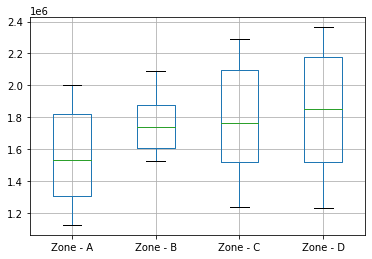

In [11]:
df.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'])